## Problem Definition
Can we predict the price of a bulldozer given its characteristics and previous examples of bulldozer prices.

## Data
From Kaggle competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data
e date o

## Evaluation
From: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction r#is. 


es# # Featur 
From: https://www.kaggle.com/c/bluebook-for-bulldozers/data?select=Data+Dictiof the sale

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Parsing Dates
We want to turn the raw data into a datetime object for Pandas to read.

In [2]:
data_frame = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])
data_frame.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


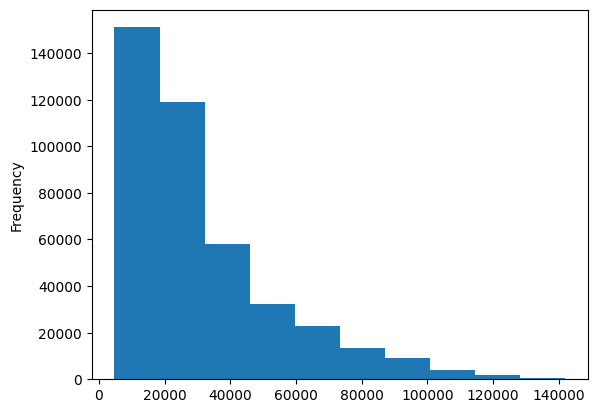

In [3]:
data_frame['SalePrice'].plot.hist();

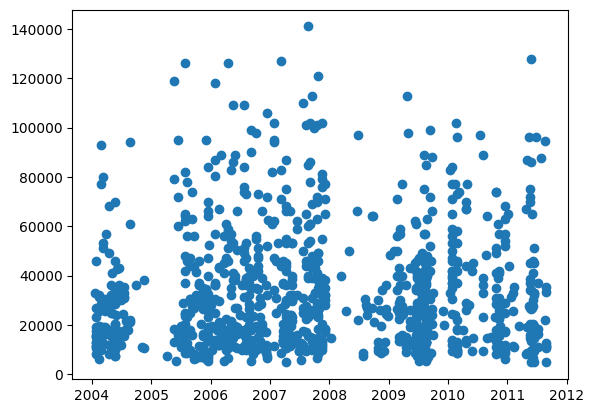

In [4]:
fig, ax = plt.subplots()
ax.scatter(data_frame["saledate"][:1000], data_frame["SalePrice"][:1000]);

### Sort Dataframe by Sale Date
When working with time series data, best practice is to sort the data by date.

In [5]:
data_frame.sort_values(by=["saledate"], inplace=True, ascending=True)
data_frame.saledate.head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

### Making a Copy of the DataFrame
Making sure we have a fallback version of the data.

In [6]:
df_temp = data_frame.copy()

### Add datetime parameters to saledate column

In [7]:
df_temp["saleYear"] = df_temp.saledate.dt.year
df_temp["saleMonth"] = df_temp.saledate.dt.month
df_temp["saleDay"] = df_temp.saledate.dt.day
df_temp["saleDayOfWeek"] = df_temp.saledate.dt.dayofweek
df_temp["saleDayOfYear"] = df_temp.saledate.dt.dayofyear

In [8]:
# since adding datetime parameters makes the saledate column obselete, drop it  
df_temp.drop("saledate", axis=1, inplace=True)

In [9]:
df_temp["state"].value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

## 5. Modelling
Now we do some model-driven EDA.

In [11]:
# importing random forest regressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=42)

# turning strings to categories
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()


### Saving Temporary Dataframe for future use

In [13]:
df_temp.to_csv("data\\bluebook-for-bulldozers\\train_temp.csv", index=False)
df_temp = pd.read_csv("data\\bluebook-for-bulldozers\\train_temp.csv", low_memory=False)